In [1]:
%matplotlib inline
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import matplotlib.pyplot as plt
import pandas as pd

cumulative  = Table.read('../data/koi-cumulative.tbl', format='ascii')
koi_list    = np.array([int(float(x.split("K")[1].strip("0"))) for x in cumulative['kepoi_name']])
kic_list    = np.array([x for x in cumulative['kepid']])
kepler_list = ["" for x in range(len(cumulative))]

ful_star   = Table.read("../data/Fulton2018_stellarradii_ajaae828t2_mrt.txt", format='ascii')
ful_planet = Table.read("../data/Fulton2018_planetradii_ajaae828t3_mrt.txt", format='ascii')

In [2]:
ful_star['KOI'][0:10]
print(ful_planet['KOI'][5].split("K"))
print(ful_star['KOI'][5])

['', '00010.01']
K00010


In [3]:
ful_planet['KOIN'] = np.array([int(float(x.split("K")[1].lstrip("0"))) for x in ful_planet['KOI']])
ful_star['KOIN'] = np.array([int(float(x.split("K")[1].lstrip("0"))) for x in ful_star['KOI']])

In [4]:
print(len(np.unique(ful_star['KOIN'])))
print(len(np.unique(ful_planet['KOIN'])))
#ful_planet['KOIN'][0:10]

1189
1189


In [5]:
ful_star['KOIN'][0:10]

1
2
6
7
8
10
17
18
20
22


In [6]:
ful_planet_df = ful_planet.to_pandas()
ful_star_df = ful_star.to_pandas()
print(ful_planet_df['KOIN'])

0          1
1          2
2          6
3          7
4          8
        ... 
1896    5900
1897    5929
1898    5949
1899    5953
1900    6102
Name: KOIN, Length: 1901, dtype: int64


In [7]:
print(ful_star_df['KOIN'])

0          1
1          2
2          6
3          7
4          8
        ... 
1184    5900
1185    5929
1186    5949
1187    5953
1188    6102
Name: KOIN, Length: 1189, dtype: int64


In [8]:
ful_planet_df
ful_star_df
ful_star_df.head()

,KOI,Teff,E_Teff,e_Teff,[Fe/H],E_[Fe/H],e_[Fe/H],Ksmag,e_Ksmag,plx,...,e_rhoiso,logAiso,E_logAiso,e_logAiso,plxspec,E_plxspec,e_plxspec,r8,RCF,KOIN
0,K00001,5819,60,60,0.01,0.04,0.04,9.846,0.022,4.668,...,0.04,9.74,0.13,0.15,4.756,0.320,0.474,1.000,1.0102,1
1,K00002,6449,60,60,0.20,0.04,0.04,9.334,0.018,2.956,...,0.00,9.25,0.04,0.05,3.661,0.411,0.586,1.001,1.0034,2
2,K00006,6348,60,60,0.04,0.04,0.04,10.995,0.023,2.128,...,0.03,9.32,0.09,0.24,2.201,0.127,0.212,1.007,1.0006,6
3,K00007,5827,60,60,0.18,0.04,0.04,10.805,0.023,2.074,...,0.02,9.78,0.09,0.08,2.112,0.228,0.274,1.000,NaN,7
4,K00008,5891,60,60,-0.07,0.04,0.04,11.040,0.018,3.011,...,0.05,9.18,0.26,0.52,2.895,0.127,0.192,1.001,NaN,8


In [9]:
ful_star_df.columns

Index(['KOI', 'Teff', 'E_Teff', 'e_Teff', '[Fe/H]', 'E_[Fe/H]', 'e_[Fe/H]',
       'Ksmag', 'e_Ksmag', 'plx', 'e_plx', 'R', 'E_R', 'e_R', 'Miso', 'E_Miso',
       'e_Miso', 'Riso', 'E_Riso', 'e_Riso', 'rhoiso', 'E_rhoiso', 'e_rhoiso',
       'logAiso', 'E_logAiso', 'e_logAiso', 'plxspec', 'E_plxspec',
       'e_plxspec', 'r8', 'RCF', 'KOIN'],
      dtype='object')

In [10]:
mps = pd.merge(ful_planet_df,ful_star_df, how = 'left', left_on = 'KOIN', right_on = 'KOIN')
#mps
#mps.columns
#print(len(ful_planet))

(0.3, 30)

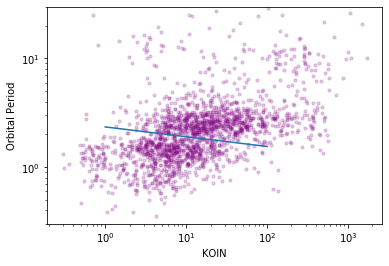

In [12]:
_x, _y = mps['P'], mps['Rp']

rvalley_x = np.arange(1, 101, 1)
log10_rvalley_y = -0.09*np.log10(rvalley_x) + .37
rvalley_y = 10.**log10_rvalley_y
plt.scatter(_x, _y, lw=1, s = 10, color = "purple",alpha = 0.2)
plt.plot(rvalley_x, rvalley_y)

plt.xlabel("KOIN")
plt.ylabel("Orbital Period")
plt.loglog()
plt.ylim(0.3,30)

(-3, 4)

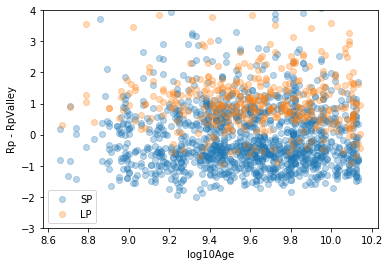

In [13]:
def Rp_valley(P):
    return 10**(-0.09*np.log10(P) + .37)

mps["Rp_valley"] = Rp_valley(mps['P'])
mps['R_diff'] = mps["Rp"] - mps["Rp_valley"]

sp = mps["P"] < 30
lp = mps["P"] > 30
plt.scatter(mps["logAiso"][sp],mps["R_diff"][sp], alpha = 0.3, label = "SP")
plt.scatter(mps["logAiso"][lp],mps["R_diff"][lp], alpha = 0.3, label = "LP")
plt.legend()
plt.xlabel("log10Age")
plt.ylabel("Rp - RpValley")
plt.ylim(-3,4)



(-3, 4)

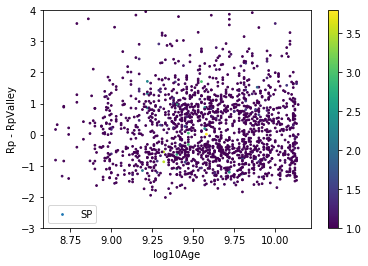

In [14]:
plt.scatter(mps["logAiso"],mps["R_diff"], c = mps["r8"], s = 3, label = "SP")
plt.legend()
plt.colorbar()
plt.xlabel("log10Age")
plt.ylabel("Rp - RpValley")
plt.ylim(-3,4)

In [15]:
arg = mps['R_diff'] < 0 
print(arg)

0       False
1       False
2       False
3       False
4        True
        ...  
1896    False
1897    False
1898    False
1899    False
1900    False
Name: R_diff, Length: 1901, dtype: bool


(0.3, 30)

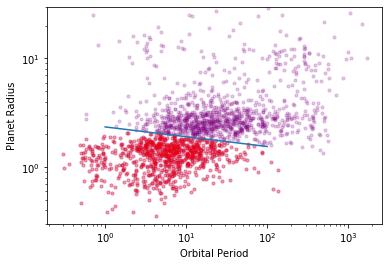

In [16]:
plt.scatter(_x, _y, lw=1, s = 10, color = "purple",alpha = 0.2)
plt.scatter(_x[arg], _y[arg], lw=1, s = 10, color = "red",alpha = 0.2)
plt.plot(rvalley_x, rvalley_y)
plt.xlabel("Orbital Period")
plt.ylabel("Planet Radius")
plt.loglog()
plt.ylim(0.3,30)

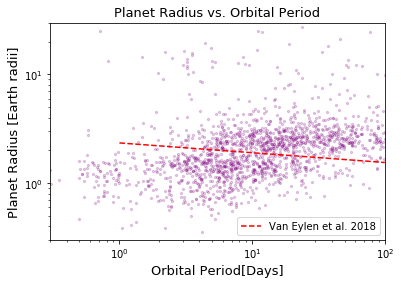

In [17]:
plt.scatter(_x, _y, lw=1, s = 5, color = "purple",alpha = 0.2)
#plt.scatter(_x[arg], _y[arg], lw=1, s = 5, color = "red",alpha = 0.2)
plt.plot(rvalley_x, rvalley_y, '--r',label = 'Van Eylen et al. 2018')
plt.xlabel("Orbital Period[Days]", size = 13)
plt.legend()
plt.ylabel("Planet Radius [Earth radii]", size = 13)
plt.title("Planet Radius vs. Orbital Period", size = 13)
plt.loglog()
plt.ylim(0.3,30)
plt.xlim(0.3,100)
plt.savefig('Radius-Period-Plot.pdf')

In [18]:
print(len(np.unique(mps['KOIN'])))

1189


/Users/Angeli/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Angeli/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  1.,   4.,   7.,  40.,  80., 121., 240., 274., 237., 350., 215.,
         77.,  36.,  24.,  33.,  32.,  30.,  14.,   6.,   7.,   1.,   3.,
          6.,   5.,   3.,   3.,   4.,   3.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   2.,   1.,   0.,   2.,   1.,   2.,   0.,   0.,   1.,
          1.,   0.,   1.,   0.,   1.,   1.]),
 array([-1.28735441, -1.05499729, -0.82264016, -0.59028303, -0.3579259 ,
        -0.12556878,  0.10678835,  0.33914548,  0.57150261,  0.80385973,
         1.03621686,  1.26857399,  1.50093112,  1.73328824,  1.96564537,
         2.1980025 ,  2.43035963,  2.66271676,  2.89507388,  3.12743101,
         3.35978814,  3.59214527,  3.82450239,  4.05685952,  4.28921665,
         4.52157378,  4.7539309 ,  4.98628803,  5.21864516,  5.45100229,
         5.68335941,  5.91571654,  6.14807367,  6.3804308 ,  6.61278792,
         6.84514505,  7.07750218,  7.30985931,  7.54221643,  7.77457356,
         8.00693069,  8.23928782,  8.47164494,  8.70400207,  8.9363592 ,
 

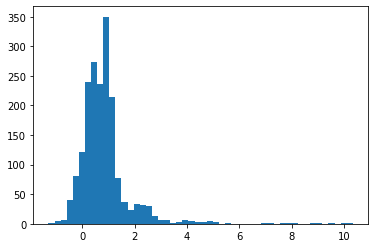

In [19]:
plt.hist(np.log(mps['Rp']), bins = 50)

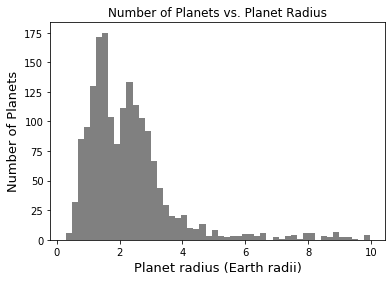

In [20]:
plt.hist(mps['Rp'][mps['Rp'] < 10], bins = 50, color = 'gray')
plt.xlabel("Planet radius (Earth radii)", size = 13)
plt.ylabel("Number of Planets", size = 13)
plt.title("Number of Planets vs. Planet Radius")
plt.savefig("fig2.pdf")